## Convolutional Neural Networks (CNNs)

In [ ]:
# %tensorflow_version 2.x
# !pip uninstall -y tensorflow
# !pip install tensorflow
# !pip install tensorflow-gpu==2.0.0-beta1
# !pip install tensorflow==2.1.0

### Import TensorFlow

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import datasets, layers, models
import datetime
import os


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#converting 3D tensor to 4D tensor
print ("Before reshaping")
print ("================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print ("\nAfter reshaping:")
print ("================")
print ("Number of axes in train_images: ", train_images.ndim)
print ("Number of axes in test_images: ", test_images.ndim)
print ("Shape of train_images: ", train_images.shape)
print ("Shape of test_images: ", test_images.shape)
print ()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Before reshaping
Number of axes in train_images:  3
Number of axes in test_images:  3
Shape of train_images:  (60000, 28, 28)
Shape of test_images:  (10000, 28, 28)

After reshaping:
Number of axes in train_images:  4
Number of axes in test_images:  4
Shape of train_images:  (60000, 28, 28, 1)
Shape of test_images:  (10000, 28, 28, 1)



### Create the convolutional base

In [3]:
model = models.Sequential()

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size.

In [4]:
model.add(layers.Conv2D(32, (3,3,), activation='relu', input_shape=(28, 28, 1)))

In [5]:
model.add(layers.MaxPooling2D((2,2)))

In [6]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [8]:
model.summary()
#we did not use padding. for 2nd and 3rd convolution op, we used 64 filters each and in first used 32 filters. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


To complete our model, we will feed the last output tensor from the convolutional base (of shape(3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output in a 3D tensor. First, we will fatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. MNIST has 10 output classes, so we use final Dense layer with 10 ouputs and a softmax activation.

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Compile and train the model

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 44s 740us/sample - loss: 0.0178 - accuracy: 0.9944
Epoch 2/5
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0119 - accuracy: 0.9964
Epoch 3/5
60000/60000 [==============================] - 43s 712us/sample - loss: 0.0118 - accuracy: 0.9962
Epoch 4/5
60000/60000 [==============================] - 44s 731us/sample - loss: 0.0098 - accuracy: 0.9968
Epoch 5/5
60000/60000 [==============================] - 42s 708us/sample - loss: 0.0086 - accuracy: 0.9973


### Evaluate the model

In [14]:
train_loss, train_acc = model.evaluate(train_images, train_labels)
print (train_acc*100, '%')

60000/60000 [==============================] - 13s 223us/sample - loss: 0.0069 - accuracy: 0.9977
99.76500272750854 %


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print (test_acc*100, '%')

10000/10000 [==============================] - 2s 241us/sample - loss: 0.0383 - accuracy: 0.9902
99.01999831199646 %


### Testing the model on extracted digits

In [16]:
# from google.colab import drive

# drive.mount('/content/drive')

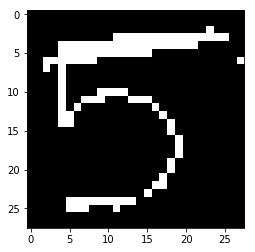

[[1.3531864e-07 1.0247054e-05 5.6334211e-06 2.0652580e-04 2.1477669e-09
  9.9964559e-01 1.0094062e-06 2.3815686e-05 3.0568560e-06 1.0407355e-04]]

The number is:  5


In [18]:
def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img=mpimg.imread('C:/Users/Phantom/MajorProjectCode/images/extracted_images/mnist/0.png')
# img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/8.jpeg')
# gray=np.invert(img)
# gray = rgb2gray(gray)
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()
# img.shape
new_img = np.expand_dims(img, axis=2)
# new_img.shape

test_predict = model.predict([[new_img]])
#test_predict
print(test_predict)
temp = test_predict.flatten()
max = 0
index = -1
for i in range(temp.size):
    if temp[i] > max:
        max=temp[i]
        index=i     

print("\nThe number is: ",index)

### Testing on Complete string

In [19]:
string=""
for z in range(8):
    path='C:/Users/Phantom/MajorProjectCode/images/extracted_images/mnist/'+str(z)+'.png'
    img=mpimg.imread(path)
    # img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/8.jpeg')
    # gray=np.invert(img)
    # gray = rgb2gray(gray)
#     plt.imshow(img, cmap=plt.get_cmap('gray'))
#     plt.show()
    # img.shape
    new_img = np.expand_dims(img, axis=2)
    # new_img.shape

    test_predict = model.predict([[new_img]])
    # test_predict
#     print(test_predict)
    temp = test_predict.flatten()
    max = 0
    index = -1
    for i in range(temp.size):
      if temp[i] > max:
        max=temp[i]
        index=i        
    string=string+str(index)

print("The String is: ",string)

The String is:  51810062


## Classification with Feedforward Neural Networks

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [21]:
model_dnn = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_dnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [22]:
model_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_dnn.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0319 - accuracy: 0.9889
Epoch 2/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0298 - accuracy: 0.9897
Epoch 3/5
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0284 - accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0272 - accuracy: 0.9906
Epoch 5/5
60000/60000 [==============================] - 10s 173us/sample - loss: 0.0267 - accuracy: 0.9906


In [55]:
test_loss, test_acc = model_dnn.evaluate(x_test, y_test)
print (test_acc*100, '%')

10000/10000 [==============================] - 1s 105us/sample - loss: 0.0767 - accuracy: 0.9810
98.1000006198883 %


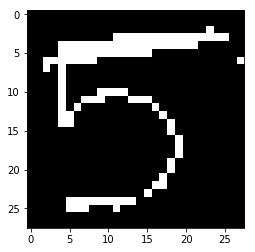

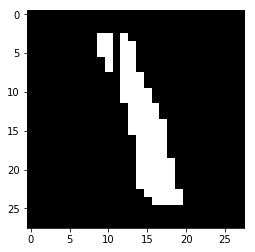

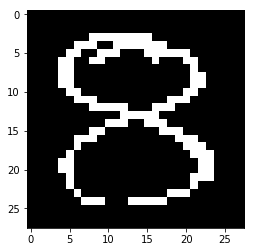

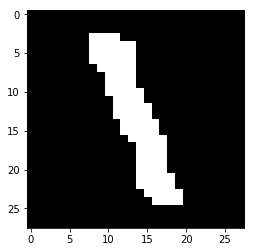

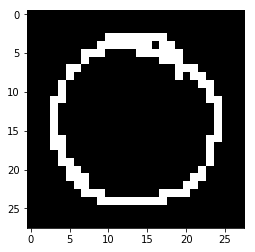

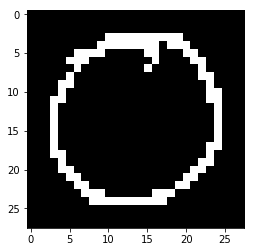

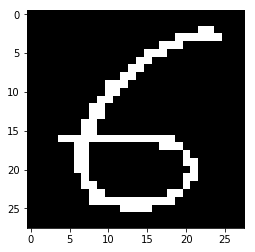

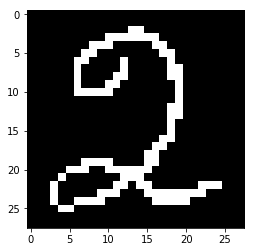

The String is:  51810062


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

string=""

for z in range(8):
    path='C:/Users/Phantom/MajorProjectCode/images/extracted_images/mnist/'+str(z)+'.png'
    img=mpimg.imread(path)
    # img = mpimg.imread('/content/drive/My Drive/Colab Notebooks/8.jpeg')
    # gray=np.invert(img)
    # gray = rgb2gray(gray)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    # img.shape
    new_img = np.expand_dims(img, axis=2)
    # new_img.shape

    test_predict = model.predict([[new_img]])
#      test_predict
#     print(test_predict)
    temp = test_predict.flatten()
    max = 0
    index = -1
    for i in range(temp.size):
      if temp[i] > max:
        max=temp[i]
        index=i        
    string=string+str(index)

print("The String is: ",string)